Building a simple feedforward artifical neural network to analyse a car dataset.
The target parameter is mpg, based upon weight, displacement, acceleration and horsepower.

The sklearn library is used to implement this model.

In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv('Car_Data.csv')
data.head()

,mpg,displacement,horsepower,weight,acceleration,model,origin,name
0,18.0,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,302.0,140,3449,10.5,70,1,ford torino


checking for any missing values in the dataset...

In [3]:
data.isnull().sum()

mpg             0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
name            0
dtype: int64

Checking the datatypes are what we expect....

In [4]:
data.dtypes

mpg             float64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
name             object
dtype: object

The horsepower parameter seems to be an object rather than an integer which is what we would expect. If we look at all the unique values in the dataset, we can see if there are any odd entries. This works on this dataset as it is relatively small, but for a larger dataset we could set a condition to look for any entry which wasnt a certain datatype or number, or within a certain range.

In [5]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We have a invalid character '?' in the horsepower column, so we should remove this.
We keep all the data points which are not equal to the '?' character, and then convert this datatype to integer.

In [6]:
data= data[data['horsepower']!='?']

In [7]:
data=data.astype({'horsepower': int})

Sometimes outliers can have an impact on the accuracy of our model. We can determine the extent to which our dataset contains outliers by plotting boxplots, which show quartiles in the data, along with outliers which are displayed outside of the boxplot whiskers as single points.

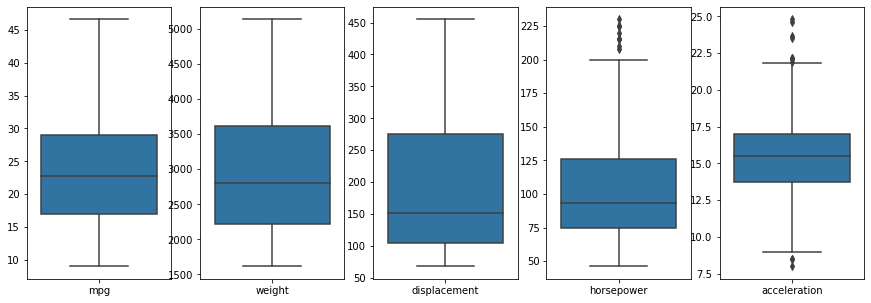

In [24]:
%matplotlib inline
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
sns.boxplot(data=data[['mpg']], ax=axs[0])
sns.boxplot(data=data[['weight']], ax=axs[1])
sns.boxplot(data=data[['displacement']], ax=axs[2])
sns.boxplot(data=data[['horsepower']], ax=axs[3])
sns.boxplot(data=data[['acceleration']], ax=axs[4])    

Looks like we have a few outliers in the horsepower and acceleration dataset, however these are not considerability outside the range of the data.
Dropping outliers should only really be done if we can be sure that the measurement was performed in error, which we cannot be sure of here.

We can look at using an activation function or metric which are less sensitive to outliers if the outliers later influence the model.

Next, we can look at the distribution of the data, to obtain further insight into our variables, and determine if they possess a gaussian distribution.

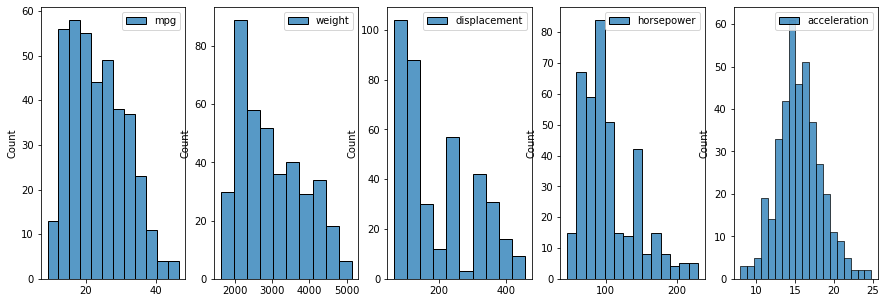

In [25]:
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
sns.histplot(data=data[['mpg']], ax=axs[0])
sns.histplot(data=data[['weight']], ax=axs[1])
sns.histplot(data=data[['displacement']], ax=axs[2])
sns.histplot(data=data[['horsepower']], ax=axs[3])
sns.histplot(data=data[['acceleration']], ax=axs[4])    

Time to build the model....

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

We set our target to be mpg, and our inputs to be weight, displacement, horsepower and acceleration.

In [11]:
x=data[['weight','displacement','horsepower','acceleration']]
y=data['mpg']

i=15
np.random.seed(i)

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=i)

We are going to scale our data using the MinMaxScaler, as from the histogram plots we can see that the data is not normally distributed.

In [12]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
mlp=MLPRegressor(activation='relu', max_iter=1000, hidden_layer_sizes=(100, 100, 100), 
                 learning_rate_init=0.001, random_state=i, shuffle=True,  solver='adam',
                nesterovs_momentum=True)


We can set verbose to True allows us to see the loss throughout the training process (this has been set to False during code upload for the sake of readability).
We need to ensure that the loss is decreasing with each iteration, and reaches a point of stability.

By monitoring the loss, we can avoid underfitting. An underfit model can be identified by loss which is not decreasing, or very high values. Loss may also continue to decrease at the end of the plot, which shows we need more training iterations.

Overfitting may be identified by looking at both the loss in training and validation, and is seen when validation loss decreases to a point but starts to increase, and training loss continues to decrease.

If validation loss is lower than training, the validation data may be easier for the model to predict than the training. 

If our training loss decreases to a point of stability but the validation loss is inconclusive, the validation dataset might not hold enough datasamples to determine the model abilities.

In [27]:
history= mlp.fit(x_train_scaled,y_train)


We can see from the training log, the training loss reached a point of stability shown on a plot of training loss vs iterations.

Text(0, 0.5, 'loss')

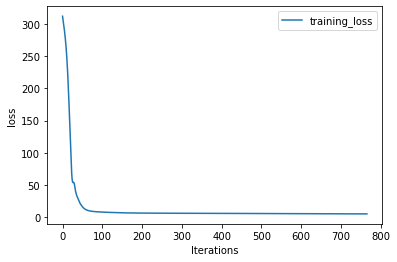

In [15]:
%matplotlib inline
historydf=pd.DataFrame(mlp.loss_curve_, columns=['training_loss'])
sns.lineplot(data=historydf)
plt.xlabel("Iterations")
plt.ylabel("loss")

We can make predictions on the test dataset using our new model.

In [16]:
predictions=mlp.predict(x_test_scaled)

Mean absolute error is more robust to outliers than mean squared error, therefore we use this metric alongside the R squared for the model.

The validation loss curve is also plotted, to ensure we dont have any overfitting of the model. 

In [29]:

mlp.fit(x_test_scaled,y_test)
history_val_df=pd.DataFrame(mlp.loss_curve_, columns=['validation_loss'])

R2 0.711720160854727
MAE 3.20723026551739


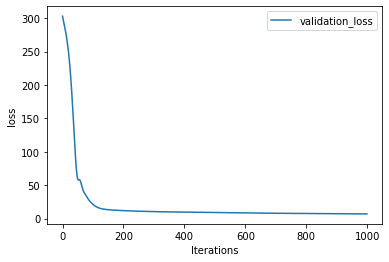

In [18]:
sns.lineplot(data=history_val_df)
plt.xlabel("Iterations")
plt.ylabel("loss")

RTWO2=sklearn.metrics.r2_score(y_test,predictions)
print('R2',RTWO2)
print('MAE',sklearn.metrics.mean_absolute_error(y_test,predictions))

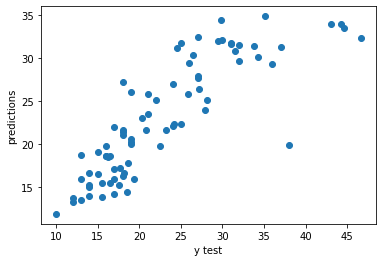

In [19]:
plt.scatter(y_test, predictions)
plt.xlabel('y test')
plt.ylabel('predictions')
plt.show()

We can view the predictions next to the expected output to determine % error and accuracy, as well allowing us to get a feel for the predictions made.

In [20]:
predictions_df=pd.DataFrame(data=predictions, columns=['predictions'])
y_test_df=y_test.to_frame()
y_test_df=y_test_df.rename(columns = {'mpg':'expected'})

results=pd.merge(predictions_df, y_test_df, left_index=True, right_index=True)
results.head(20)

,predictions,expected
2,34.432345,18.0
6,29.643032,14.0
13,22.070400,14.0
18,27.660031,27.0
21,29.416774,24.0
24,31.343727,21.0
25,21.663664,10.0
34,17.232316,16.0
36,19.750106,19.0
45,26.351030,18.0


In [21]:
results['error %']=(abs(results['predictions']-results['expected'])/results['predictions'])*100

In [22]:
results.head(20)

,predictions,expected,error %
2,34.432345,18.0,47.723573
6,29.643032,14.0,52.771363
13,22.070400,14.0,36.566623
18,27.660031,27.0,2.386228
21,29.416774,24.0,18.413895
24,31.343727,21.0,33.000949
25,21.663664,10.0,53.839758
34,17.232316,16.0,7.151194
36,19.750106,19.0,3.797983
45,26.351030,18.0,31.691474


In [23]:
results.describe()

,predictions,expected,error %
count,16.000000,16.000000,16.000000
mean,23.926717,17.687500,36.050525
std,6.924305,4.989572,31.044372
min,11.887939,10.000000,2.386228
25%,19.120658,14.000000,11.025768
50%,22.551595,17.500000,34.783786
75%,29.473339,19.500000,48.985520
max,34.863495,27.000000,127.120954


Looking at the expected vs predicted results in a dataframe, we can see the average percentage error is 36.1%. Now is the type to improve our model with some hyperparameter tuning, and also investigation into feature importance, details of which can be found in the 'ANN- Feature Importance- Appliance Energy Consumption Prediction.ipynb' file.